<a href="https://colab.research.google.com/github/jwhwang80/mlexample/blob/master/deeplearning4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 네번째 DNN Example

데이터 불러 오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4423680/4422102 [==============================] - 0s 0us/step


합성곱 신경망 만들기

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               313700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

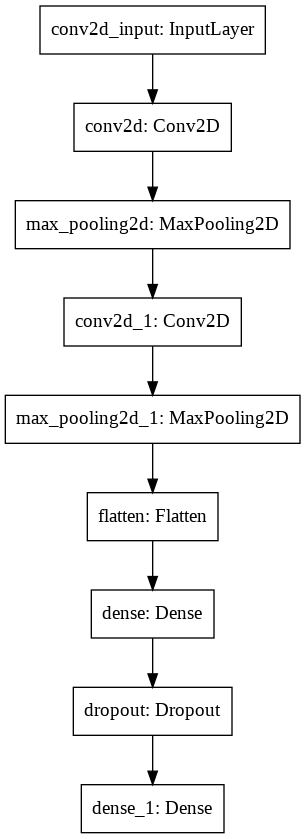

In [2]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', 
                              input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
keras.utils.plot_model(model)

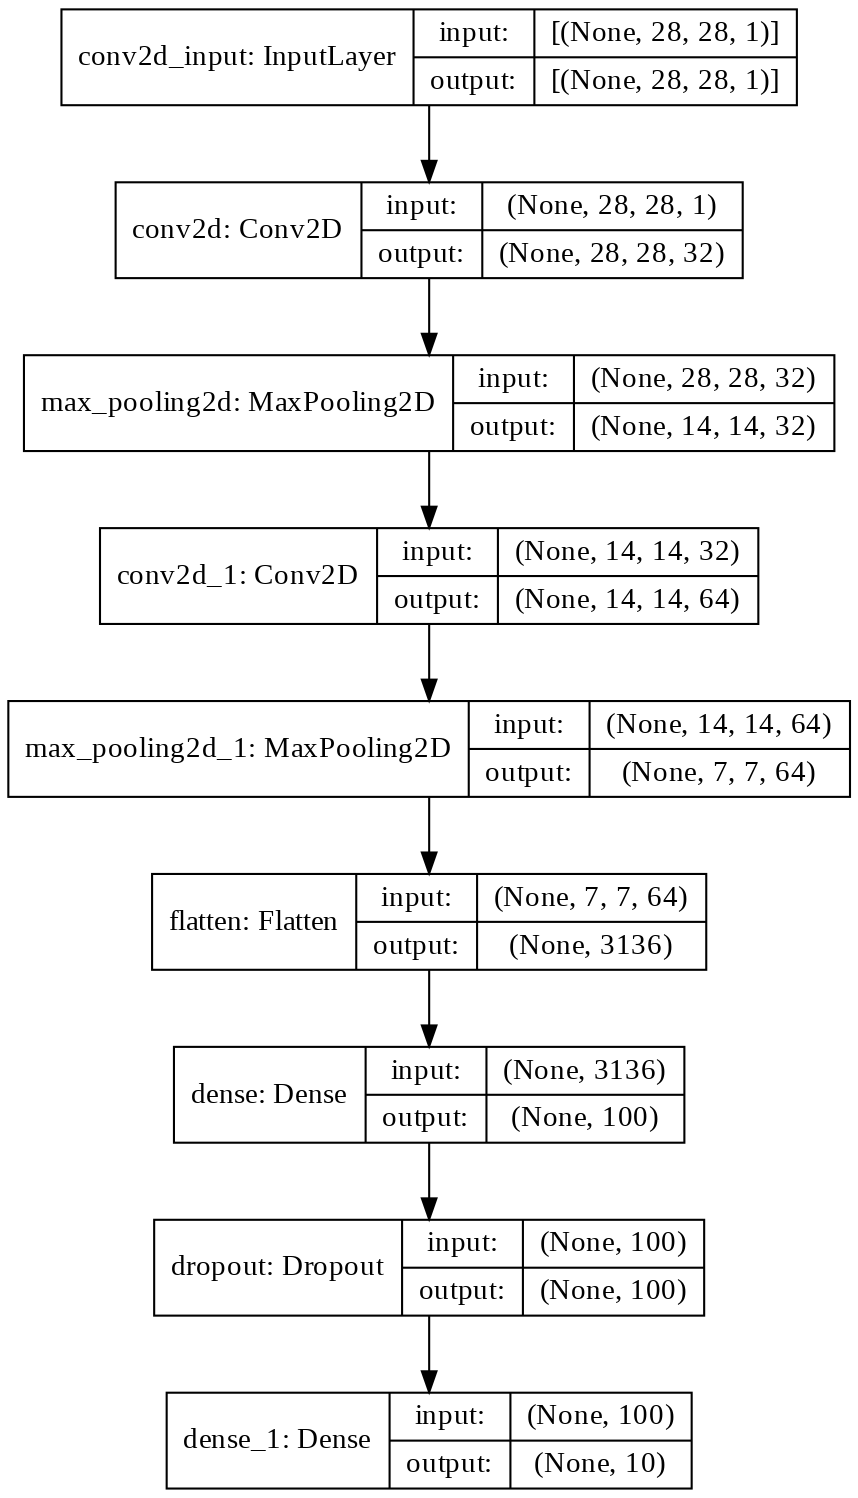

In [3]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=150)

모델 컴파일과 훈련

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 39s 6ms/step - loss: 0.6747 - accuracy: 0.7591 - val_loss: 0.3241 - val_accuracy: 0.8779
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3306 - accuracy: 0.8826 - val_loss: 0.2773 - val_accuracy: 0.8936
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2741 - accuracy: 0.8991 - val_loss: 0.2500 - val_accuracy: 0.9078
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2398 - accuracy: 0.9118 - val_loss: 0.2297 - val_accuracy: 0.9139
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2144 - accuracy: 0.9189 - val_loss: 0.2305 - val_accuracy: 0.9149
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1885 - accuracy: 0.9304 - val_loss: 0.2078 - val_accuracy: 0.9235
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1730 - accuracy: 0.9355 - val_loss: 0.2166 - val_accuracy

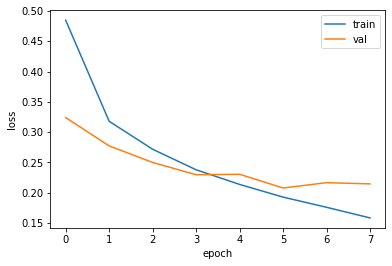

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [6]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.2078 - accuracy: 0.9235


[0.20782460272312164, 0.9235000014305115]

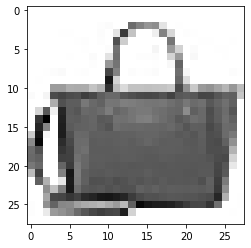

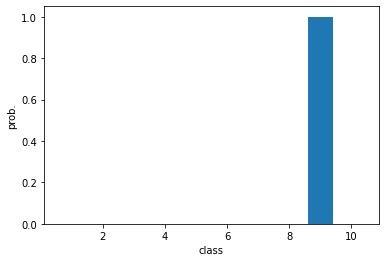

가방


In [9]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

import numpy as np
print(classes[np.argmax(preds)])

In [10]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 1s 4ms/step - loss: 0.2256 - accuracy: 0.9193


[0.2256152331829071, 0.9193000197410583]